<a href="https://colab.research.google.com/github/LCaravaggio/ML_conPython/blob/main/Predicci%C3%B3n_Ingresos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# 2. Cargar dataset Adult Income desde internet

In [8]:
from datasets import load_dataset

df = load_dataset("scikit-learn/adult-census-income")

README.md: 0.00B [00:00, ?B/s]

adult.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/32561 [00:00<?, ? examples/s]

In [12]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Los nombres de las columnas según la documentación oficial
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

df = pd.read_csv(url, header=None, names=column_names, na_values=' ?')

# 3. Exploración inicial

In [13]:
print("Primeras filas:")
df.head()

Primeras filas:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
print("\nInformación general:")
df.info()


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


In [16]:
print("\nDistribución de la variable objetivo:")
print(df['income'].value_counts())


Distribución de la variable objetivo:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64


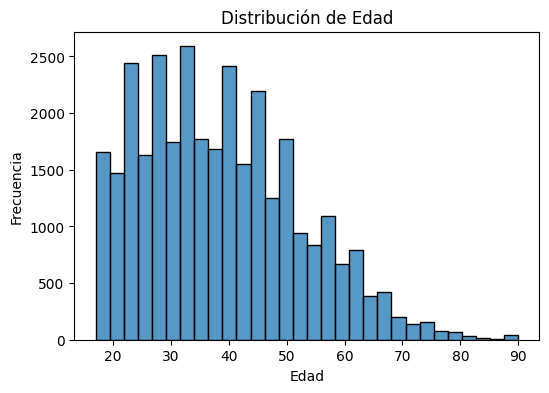

In [17]:
# Histograma de edad
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=30, kde=False)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


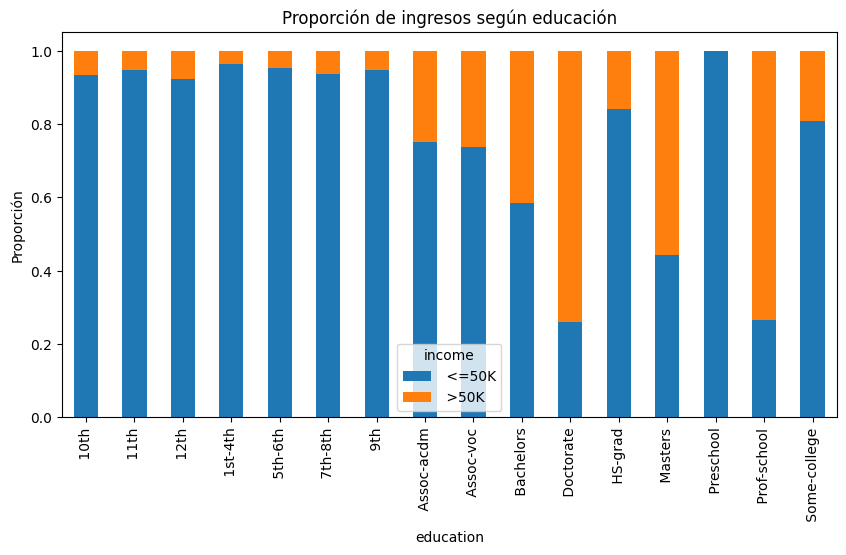

In [18]:
# Tabla cruzada educación-ingreso
cross_tab = pd.crosstab(df['education'], df['income'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Proporción de ingresos según educación')
plt.ylabel('Proporción')
plt.show()

# 4. Preprocesamiento

In [19]:
df.dropna(subset=['workclass','occupation','native_country'], inplace=True)

X = df.drop('income', axis=1)
y = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough' # las numéricas se dejan igual
)

# 5. Train-Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 6. Árbol de decisión (clasificación)

In [22]:
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', tree_clf)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# 7. Evaluación

In [28]:
print("\nMétricas de clasificación:")
print(classification_report(y_test, y_pred))


Métricas de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4531
           1       0.78      0.50      0.61      1502

    accuracy                           0.84      6033
   macro avg       0.82      0.73      0.75      6033
weighted avg       0.83      0.84      0.83      6033



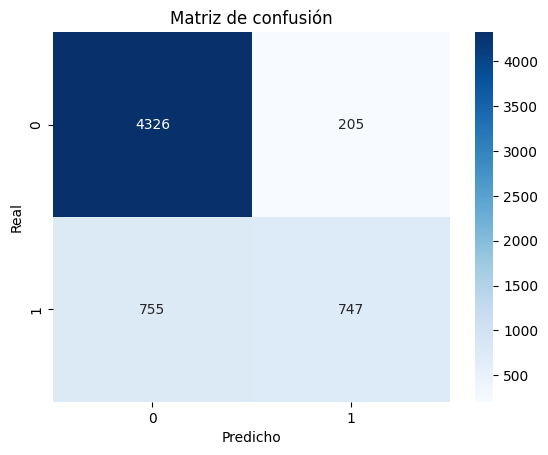

In [29]:
bcm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# 8. Visualización del árbol (primeros nodos)

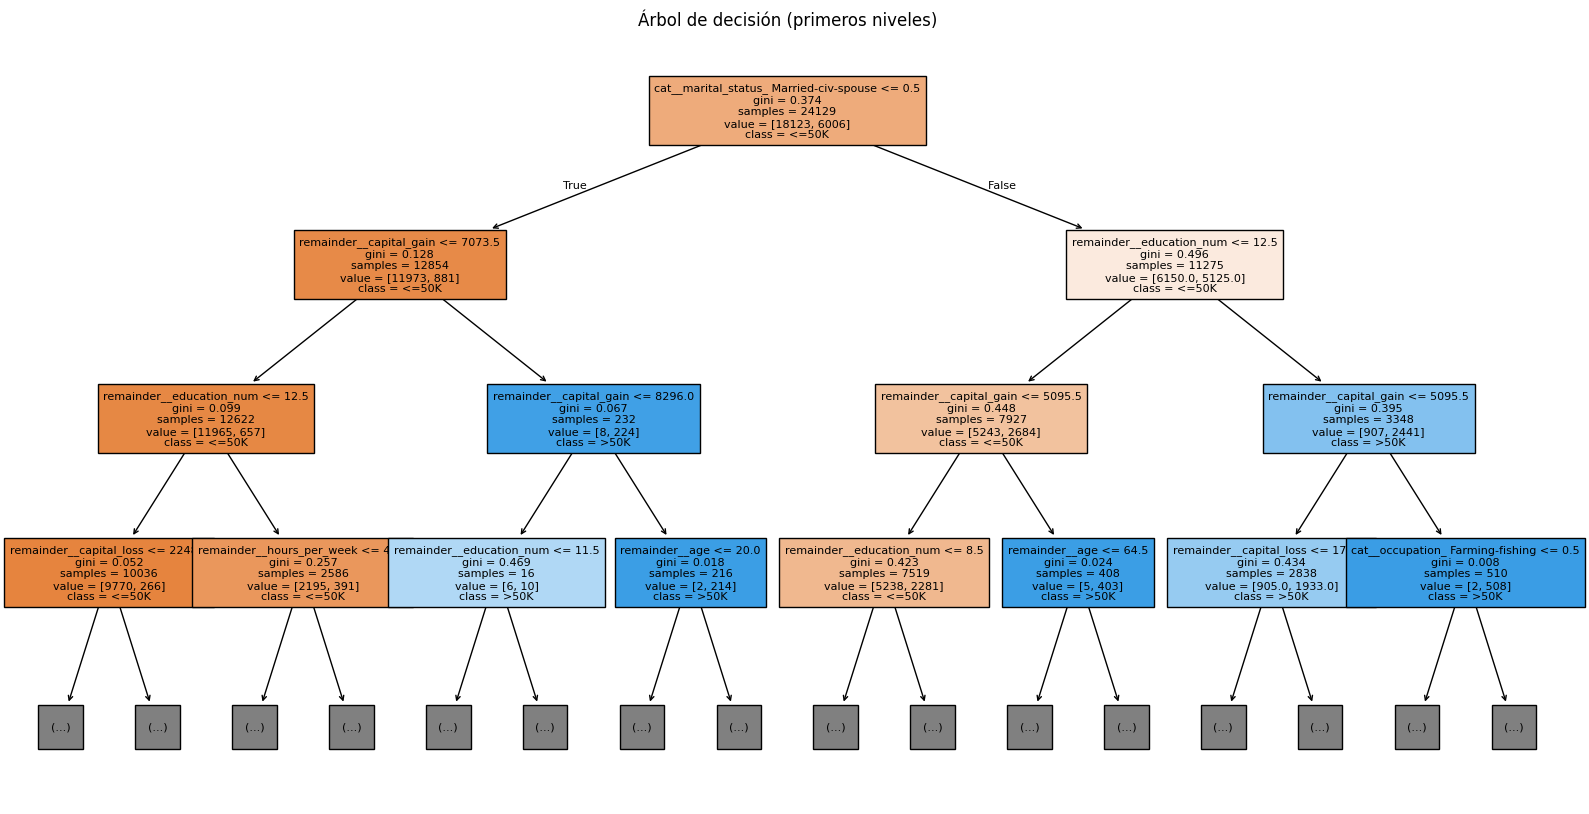

In [27]:
# Necesitamos ver el árbol directamente sobre los features transformados:
X_train_enc = preprocessor.fit_transform(X_train)
feature_names = preprocessor.get_feature_names_out()

plt.figure(figsize=(20,10))
plot_tree(tree_clf,
          feature_names=feature_names,
          class_names=['<=50K','>50K'],
          fontsize=8,
          filled=True,
          max_depth=3)
plt.title('Árbol de decisión (primeros niveles)')
plt.show()